### LSTM ARCHITECTURE

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv('CYBER.csv', encoding="latin-1")
Data.head()

,tweet_text,cyberbullying_type
0,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
1,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
2,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
3,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
4,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying


In [3]:
Data.tail()

,tweet_text,cyberbullying_type
31890,"Black ppl aren't expected to do anything, depe...",ethnicity
31891,Turner did not withhold his disappointment. Tu...,ethnicity
31892,I swear to God. This dumb nigger bitch. I have...,ethnicity
31893,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
31894,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [4]:
Data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'religion', 'age', 'ethnicity'], dtype=object)

In [5]:
sorted(Data['cyberbullying_type'].value_counts())

[7944, 7961, 7992, 7998]

In [6]:
Data['tweet_text'] = Data['tweet_text'].apply(lambda x: x.lower() if pd.notna(x) else "")

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Data['cyberbullying_type'] = label_encoder.fit_transform(Data['cyberbullying_type'])

In [8]:
num_classes = len(label_encoder.classes_) 

In [9]:
x = Data['tweet_text']
y = Data['cyberbullying_type']

In [10]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=num_classes)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
max_words = 10000  
max_sequence_length = 100

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

In [14]:
X_train_sequences = tokenizer.texts_to_sequences(x_train)
X_test_sequences = tokenizer.texts_to_sequences(x_test)

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [16]:
embedding_dim = 100  
lstm_units = 128

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(units=num_classes, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_path = "LSTM.h5"

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [21]:
epochs = 10
batch_size = 32

In [22]:
model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[M])

Epoch 1/10
718/718 [==============================] - ETA: 0s - loss: 0.2855 - accuracy: 0.8942
Epoch 1: accuracy improved from -inf to 0.89423, saving model to LSTM.h5
718/718 [==============================] - 228s 309ms/step - loss: 0.2855 - accuracy: 0.8942 - val_loss: 0.1096 - val_accuracy: 0.9683
Epoch 2/10
718/718 [==============================] - ETA: 0s - loss: 0.0900 - accuracy: 0.9730
Epoch 2: accuracy improved from 0.89423 to 0.97300, saving model to LSTM.h5
718/718 [==============================] - 308s 429ms/step - loss: 0.0900 - accuracy: 0.9730 - val_loss: 0.1066 - val_accuracy: 0.9683
Epoch 3/10
718/718 [==============================] - ETA: 0s - loss: 0.0611 - accuracy: 0.9816
Epoch 3: accuracy improved from 0.97300 to 0.98158, saving model to LSTM.h5
718/718 [==============================] - 321s 447ms/step - loss: 0.0611 - accuracy: 0.9816 - val_loss: 0.1186 - val_accuracy: 0.9690
Epoch 4/10
718/718 [==============================] - ETA: 0s - loss: 0.0424 - acc

In [23]:
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

200/200 [==============================] - 5s 23ms/step


In [24]:
from sklearn.metrics import accuracy_score

AC = accuracy_score(y_true_classes,y_pred_classes)

print("THE ACCURACY SCORE OF LSTM ARCHITECTURE IS :",AC*100)

THE ACCURACY SCORE OF LSTM ARCHITECTURE IS : 95.25003919109578


In [25]:
from sklearn.metrics import hamming_loss

HL = hamming_loss(y_true_classes,y_pred_classes)

print("THE HAMMING LOSS OF LSTM ARCHITECTURE IS :",HL*100)

THE HAMMING LOSS OF LSTM ARCHITECTURE IS : 4.749960808904217


In [26]:
from sklearn.metrics import classification_report

CM = classification_report(y_true_classes,y_pred_classes)

print('THE CLASSIFICATION REPORT OF LSTM ARCHITECTURE:\n\n\n',CM)

THE CLASSIFICATION REPORT OF LSTM ARCHITECTURE:


               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1536
           1       0.98      0.98      0.98      1604
           2       0.92      0.91      0.92      1592
           3       0.96      0.94      0.95      1647

    accuracy                           0.95      6379
   macro avg       0.95      0.95      0.95      6379
weighted avg       0.95      0.95      0.95      6379



In [27]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_true_classes,y_pred_classes)

print('THE CONFUSION MATRIX SCORE OF LSTM ARCHITECTURE:\n\n\n',CM)

THE CONFUSION MATRIX SCORE OF LSTM ARCHITECTURE:


 [[1506    2   27    1]
 [  13 1565   20    6]
 [  73   18 1449   52]
 [  11    4   76 1556]]


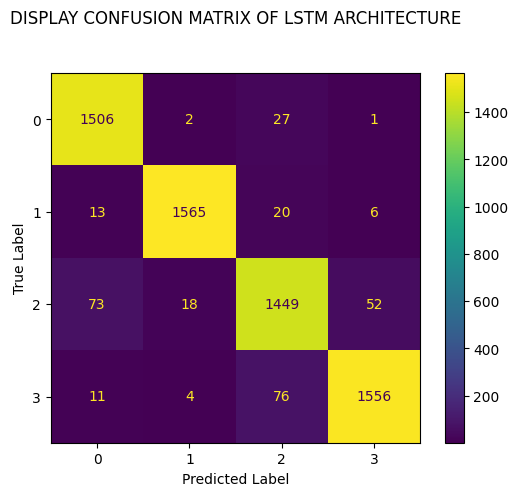

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have the y_pred_classes and y_true_classes arrays with predicted and true labels respectively.

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix using ConfusionMatrixDisplay
classes = np.arange(cm.shape[0])  # Assuming your classes are integers from 0 to n_classes-1
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')

plt.title('DISPLAY CONFUSION MATRIX OF LSTM ARCHITECTURE\n\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


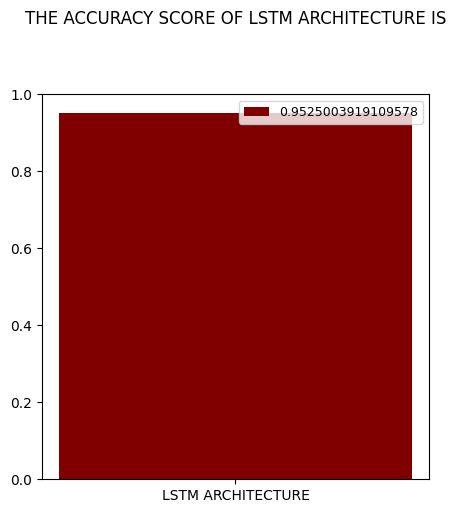

In [29]:
def graph():
    import matplotlib.pyplot as plt
    data=[AC]
    alg="LSTM ARCHITECTURE"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("MAROON"))
    plt.title("THE ACCURACY SCORE OF LSTM ARCHITECTURE IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()